In [1]:
# Imports
import missingno as msno
import numpy as np
import pandas as pd

In [2]:
# We give the columns name explicitly, as they are not included in the dataset
COLUMNS = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "revenue"
]

In [3]:
# Loading the data
data = pd.read_csv("data/adult.data", index_col=False, 
                   names=COLUMNS, sep=", ", engine="python", na_values=['?'])

In [4]:
# Let's have a look at the data
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,revenue
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# Let's check where the missing values are
pd.isna(data).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
revenue              0
dtype: int64

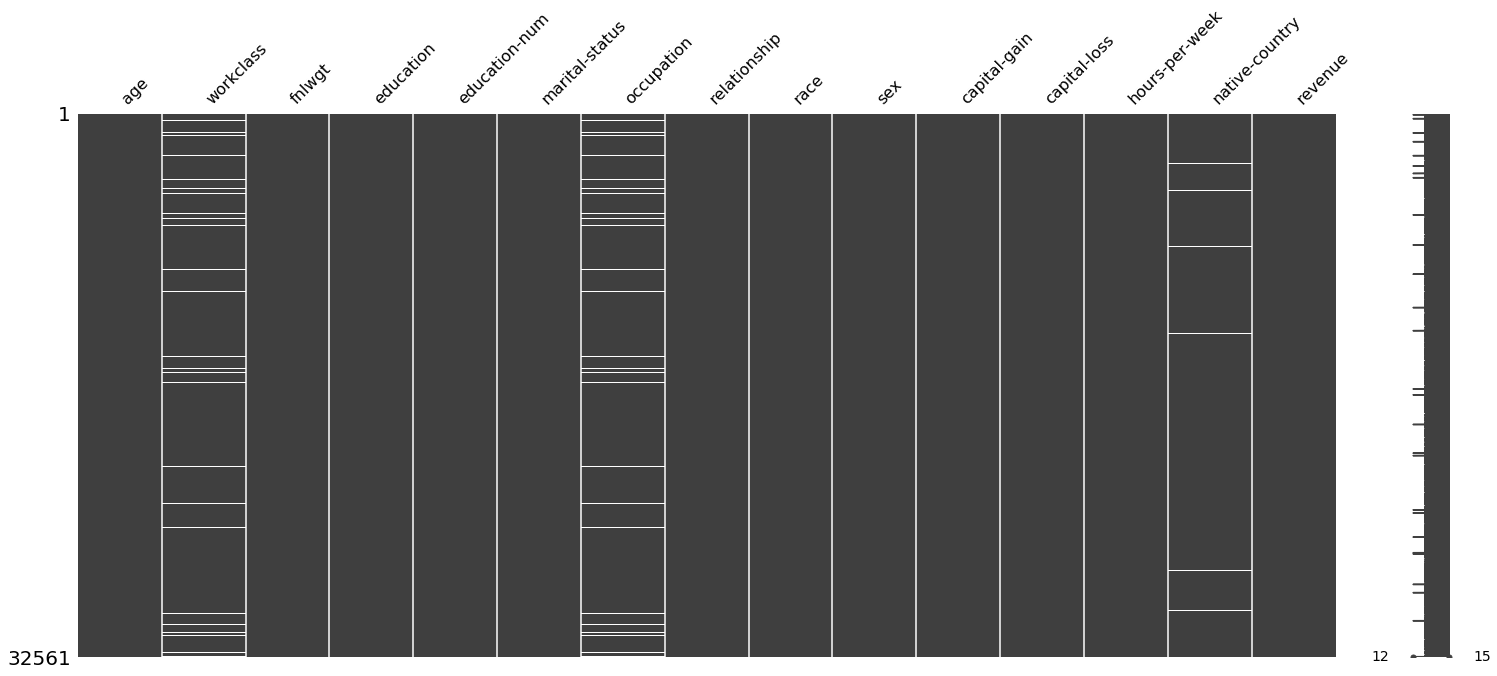

In [7]:
# We get a graphical representation of the holes in values
msno.matrix(data)

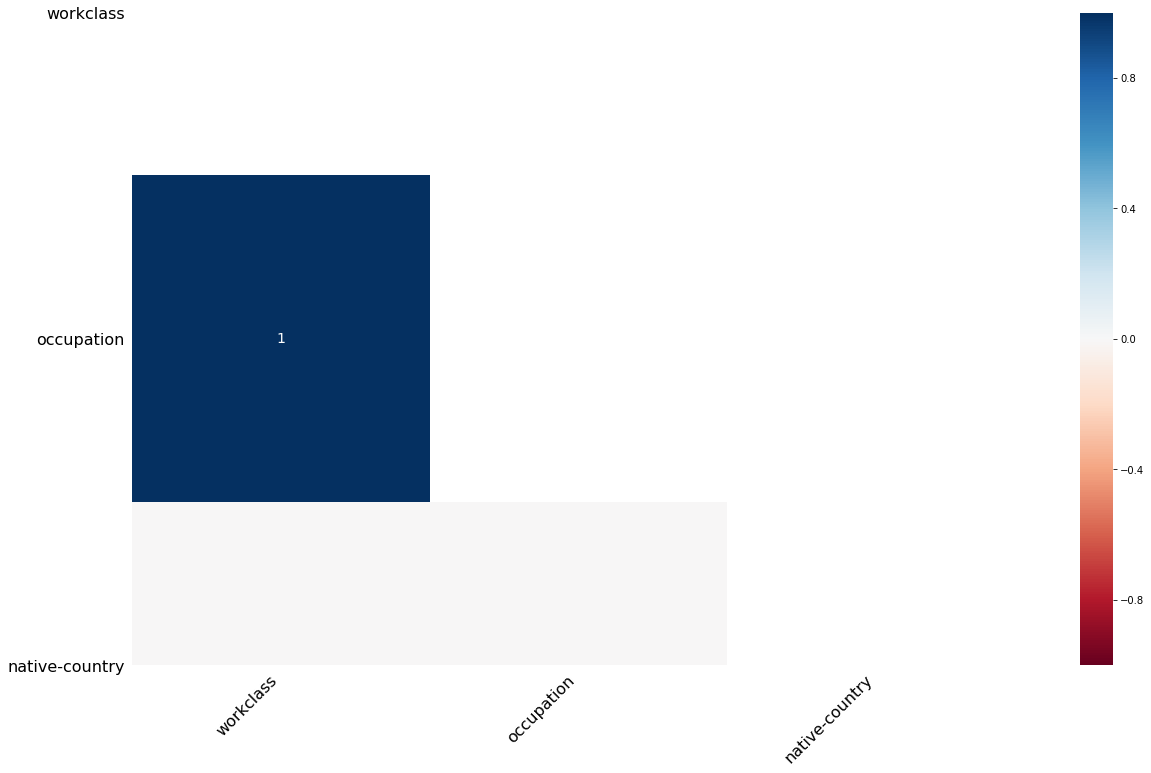

In [8]:
msno.heatmap(data)

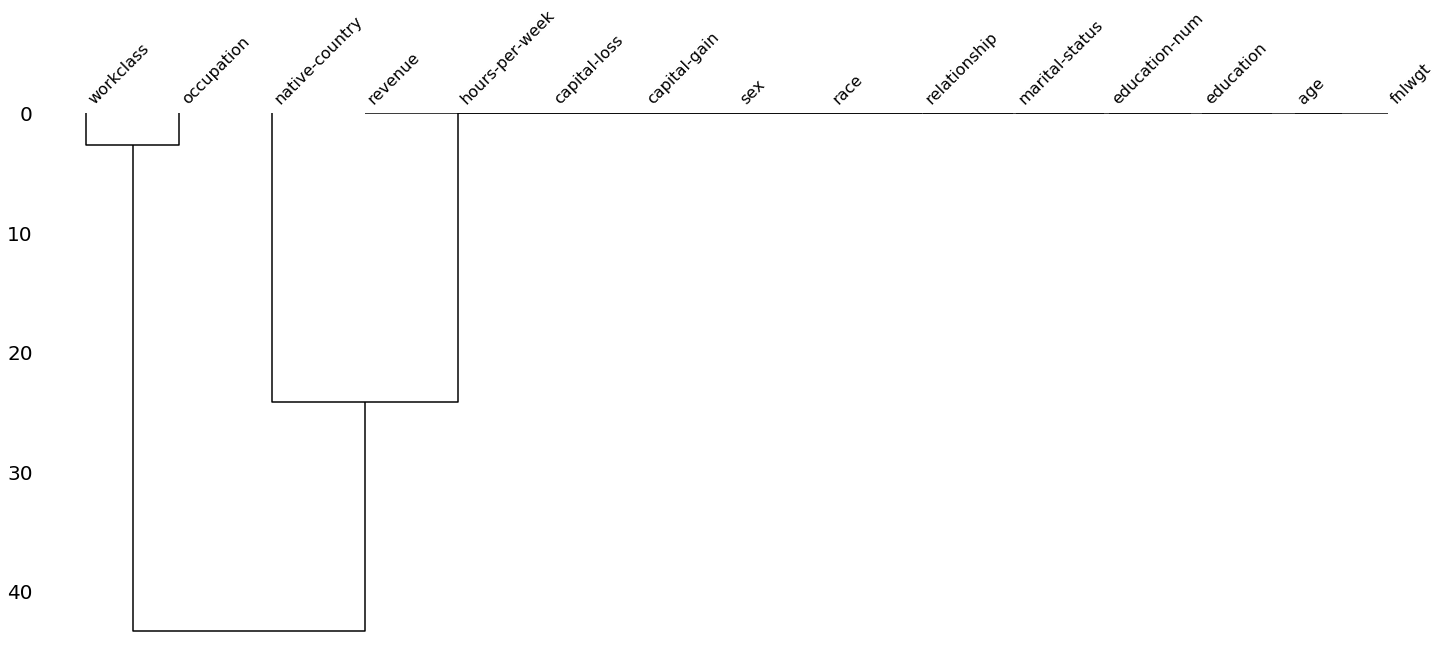

In [9]:
msno.dendrogram(data)

In [10]:
# We need to deal with categorical variables
clean_revenue = {'revenue': {'<=50K': 0, '>50K': 1}}
data.replace(clean_revenue, inplace=True)

In [11]:
CATEGORICAL_VARIABLES = [
    "workclass",
    "education",
    "marital-status",
    "relationship",
    "race",
    "sex",
    "native-country",
    "occupation"
]

In [12]:
# We analyse categorical variables to make them easily usable in our classification
for variable in CATEGORICAL_VARIABLES:
    print(variable)
    print(data[variable].unique())

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex
['Male' 'Female']
native-country
['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' '

In [13]:
# There too many categories to choose the dummy method
# We choose to use category labels

In [80]:
categorical_columns = set()
for variable in CATEGORICAL_VARIABLES:
    data[variable] = data[variable].astype('category')
    data[variable + '_cat'] = data[variable].cat.codes
    categorical_columns.add(variable + '_cat')

In [81]:
columns_to_select = set(COLUMNS) - set(CATEGORICAL_VARIABLES) | categorical_columns

In [82]:
selected_data = data[columns_to_select]

In [83]:
selected_data

,relationship_cat,fnlwgt,education-num,education_cat,marital-status_cat,workclass_cat,sex_cat,capital-loss,age,hours-per-week,native-country_cat,capital-gain,race_cat,revenue,occupation_cat
0,1,77516,13,9,4,6,1,0,39,40,38,2174,4,0,0
1,0,83311,13,9,2,5,1,0,50,13,38,0,4,0,3
2,1,215646,9,11,0,3,1,0,38,40,38,0,4,0,5
3,0,234721,7,1,2,3,1,0,53,40,38,0,2,0,5
4,5,338409,13,9,2,3,0,0,28,40,4,0,2,0,9
5,5,284582,14,12,2,3,0,0,37,40,38,0,4,0,3
6,1,160187,5,6,3,3,0,0,49,16,22,0,2,0,7
7,0,209642,9,11,2,5,1,0,52,45,38,0,4,1,3
8,1,45781,14,12,4,3,0,0,31,50,38,14084,4,1,9
9,0,159449,13,9,2,3,1,0,42,40,38,5178,4,1,3


In [86]:
# The category label method does not handle properly the NA values, so we need to retreat them manually afterwards
replacement = dict()
for col in categorical_columns:
    replacement[col] = {-1: np.NaN}
selected_data.replace(replacement, inplace=True)

/Users/msenechal/Documents/Projets/article-missing-values/venv/lib/python3.6/site-packages/pandas/core/generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [20]:
selected_data

,workclass_cat,education_cat,marital-status_cat,relationship_cat,race_cat,sex_cat,native-country_cat,occupation_cat,fnlwgt,education-num,capital-loss,age,hours-per-week,capital-gain,revenue
0,6.0,9,4,1,4,1,38.0,0.0,77516,13,0,39,40,2174,0
1,5.0,9,2,0,4,1,38.0,3.0,83311,13,0,50,13,0,0
2,3.0,11,0,1,4,1,38.0,5.0,215646,9,0,38,40,0,0
3,3.0,1,2,0,2,1,38.0,5.0,234721,7,0,53,40,0,0
4,3.0,9,2,5,2,0,4.0,9.0,338409,13,0,28,40,0,0
5,3.0,12,2,5,4,0,38.0,3.0,284582,14,0,37,40,0,0
6,3.0,6,3,1,2,0,22.0,7.0,160187,5,0,49,16,0,0
7,5.0,11,2,0,4,1,38.0,3.0,209642,9,0,52,45,0,1
8,3.0,12,4,1,4,0,38.0,9.0,45781,14,0,31,50,14084,1
9,3.0,9,2,0,4,1,38.0,3.0,159449,13,0,42,40,5178,1


# The possibilities to treat missing values
We have different possibilities to handle missing values:
* depending on the proportion of missing values:
  * remove the lines containing the missing values (if the number of missing values is limited (less than 10% by rule of thumb)
  * remove the columns containing the missing values (if the number of missing values is consequent on the concerned columns)
* for numerical missing values:
  * using the mean or the median of the column to fill in missing values (the median will be preferred if the distribution of the column contains outliers, as median is less sensitive to it)
  * prediction models
* for categorical missing values:
  * using the most frequent category
  * prediction models

## Test 1: keeping the missing values, with no treatment

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
def accuracy(data):
    model = LogisticRegression()
    X = data.drop(columns="revenue")
    y = data.loc[:, "revenue"].values
    model.fit(X, y)
    predicted_classes = model.predict(X)
    return accuracy_score(y.flatten(),predicted_classes)


In [180]:
clean_data = selected_data

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
accuracy(clean_data)

/Users/msenechal/Documents/Projets/article-missing-values/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Scikit-learn implementation of the logistic regression is not robust to NA values, so it doesn't work...

## Test 2: deletion of rows with missing data

In [182]:
clean_data = selected_data.dropna()

In [183]:
accuracy(clean_data)

/Users/msenechal/Documents/Projets/article-missing-values/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7868841588754062

In [62]:
clean_data.shape[0] / selected_data.shape[0]

0.9263229016307853

This is the most basic (and radical) way to handle missing data, as we simply delete any row containing a missing value.
We are lucky here, because we lose less than 8% of the total rows with this operation, but it might not always be the case.

## Test 3: replacing missing values with mean or median

In [63]:
CATEGORICAL_VARIABLES

['workclass',
 'education',
 'marital-status',
 'relationship',
 'race',
 'sex',
 'native-country',
 'occupation']

In [186]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
selected_data_cat = selected_data.loc[:,categorical_columns]
selected_data_non_cat = selected_data.loc[:,~selected_data.columns.isin(categorical_columns)]
clean_data_non_cat = pd.DataFrame(imputer.fit_transform(selected_data_non_cat), columns=selected_data_non_cat.columns)
clean_data_cat = selected_data_cat.fillna(dict(selected_data_cat.median()))
clean_data = pd.concat([clean_data_cat, clean_data_non_cat], axis=1)

In [187]:
accuracy(clean_data)

/Users/msenechal/Documents/Projets/article-missing-values/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7989619483431099

The modification of the method to handle missing values increases the accuracy from 78.6% to 79.8%.
The impact is directly measurable.

## Test 4: Use a neighbour value to fill in the holes

In [188]:
clean_data = selected_data.fillna(method="ffill")

In [189]:
accuracy(clean_data)

/Users/msenechal/Documents/Projets/article-missing-values/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7985626977058444

The accuracy of this method is slightly the same as using an arbitrary value to fill (mean, median...) the holes.
This tends to show that it is preferable not to drop rows, but to find a solution to replace the missing values.

## Test 5: using a probability method to fill in missing values

Using the mean or the median to systematically replaces missing values introduce a bias in the sample. 
One way to preserve the distribution of the sample is to randomly pick values coherently with the distribution of known values to replace missing values.
Different solutions are possible to do so. We will try a simple solution consisting of a random sampling with replacement, without discriminating between categorical values and numerical values.

In [191]:
columns_with_na = selected_data.columns[selected_data.isnull().any()]

In [192]:
import random
fill = dict()
for col in columns_with_na:
    sample = selected_data.loc[:, col].dropna()
    index = selected_data[selected_data[col].isnull()].index
    values = [sample[random.choice(sample.index)] for i in range(index.shape[0])]
    fill[col] = dict(zip(index, values))
clean_data = selected_data.fillna(fill)

In [193]:
accuracy(clean_data)

/Users/msenechal/Documents/Projets/article-missing-values/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7986548324682903

The improvement is not spectacular on this model, but we ensure that we do not deform the probability distribution of our data by doing it this way, which can be critical to the behaviour of the model we want to fit on these data.